<a href="https://colab.research.google.com/github/azario0/data_analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algeria 2.0
# Workshop : Data Analysis with Python
### Presented by : Benmalek Zohir

# 1_Data Loading and Cleaning

In [1]:
import pandas as pd

# Step 0: Create a sample CSV file
data = {
    'Name': ['Mounir', 'Asia', 'Amin'],
    'Age': [None, 40, 55],  # None (missing value) and an invalid age (999)
    'City': ['Oran', 'Algiers', 'Tlemcen'],
    'Salary': ['40000 Dzd', '70000 Dzd', None]  # Missing salary value
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save it as a CSV file near the notebook
csv_filename = 'example_data.csv'
df.to_csv(csv_filename, index=False)

### Loading and cleaning the data

In [2]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv('example_data.csv')
print("\n\nOriginal Data:\n\n")
print(df)


# Step 2 : Check for missing values
print("\n\nMissing values per column:\n\n")
print(df.isnull().sum())


# Step 3 : Fill missing age values with the mean
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
print('\n\n\nAFTER \n\n')
print(df)



Original Data:


     Name   Age     City     Salary
0  Mounir   NaN     Oran  40000 Dzd
1    Asia  40.0  Algiers  70000 Dzd
2    Amin  55.0  Tlemcen        NaN


Missing values per column:


Name      0
Age       1
City      0
Salary    1
dtype: int64



AFTER 


     Name   Age     City     Salary
0  Mounir  47.5     Oran  40000 Dzd
1    Asia  40.0  Algiers  70000 Dzd
2    Amin  55.0  Tlemcen        NaN


In [3]:
# Step 4 : Remove 'Dzd' from salary and convert to numeric
df['Salary'] = df['Salary'].str.replace(' Dzd', '')
df['Salary'] = pd.to_numeric(df['Salary'])

# Step 5 : Calculate the mean salary
mean_salary = df['Salary'].mean()

# Step 6 : Fill missing salary values with the mean
df['Salary'] = df['Salary'].fillna(mean_salary)

# Step 7 : Rename 'Salary' column to 'Salary (Dzd)'
df.rename(columns={'Salary': 'Salary (Dzd)'}, inplace=True)

print('\n\nFINAL\n\n')
print(df)



FINAL


     Name   Age     City  Salary (Dzd)
0  Mounir  47.5     Oran       40000.0
1    Asia  40.0  Algiers       70000.0
2    Amin  55.0  Tlemcen       55000.0


# 2_Data Exploration

In [4]:
# Create a sample dataset or load from a CSV file
data = {
    'Name': ['Amin', 'Nawel', 'Asma', 'Rachid', 'Bachir'],
    'Age': [25, 30, 35, 40, 29],
    'City': ['Tlemcen', 'Oran', 'Wergla', 'Constantine', 'Bechar'],
    'Salary': [50000, 60000, 70000, 80000, 55000]
}

# Create a DataFrame
df = pd.DataFrame(data)


df


,Name,Age,City,Salary
0,Amin,25,Tlemcen,50000
1,Nawel,30,Oran,60000
2,Asma,35,Wergla,70000
3,Rachid,40,Constantine,80000
4,Bachir,29,Bechar,55000


In [5]:
# 0: Basic data inspection
print("\nFirst 5 rows of the dataset:n\n")
print(df.head())

print("\n\n\nSummary of the dataset:n\n")
print(df.info())


First 5 rows of the dataset:n

     Name  Age         City  Salary
0    Amin   25      Tlemcen   50000
1   Nawel   30         Oran   60000
2    Asma   35       Wergla   70000
3  Rachid   40  Constantine   80000
4  Bachir   29       Bechar   55000



Summary of the dataset:n

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
 3   Salary  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes
None


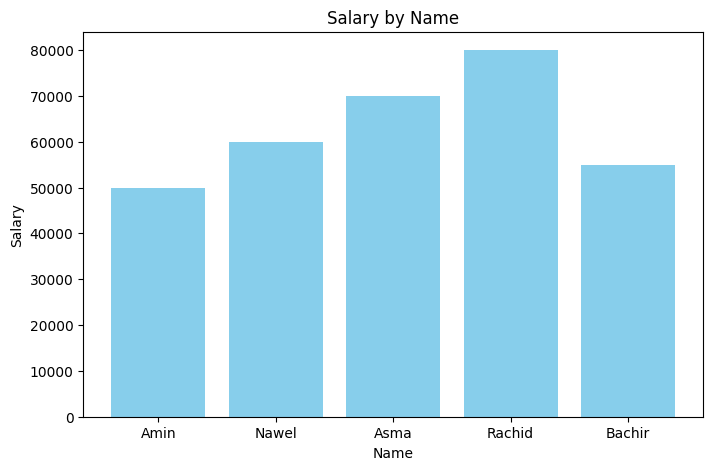

In [6]:
import matplotlib.pyplot as plt


# 1. Bar Plot of Salary by Name
plt.figure(figsize=(8, 5))
plt.bar(df['Name'], df['Salary'], color='skyblue')
plt.title('Salary by Name')
plt.xlabel('Name')
plt.ylabel('Salary')
plt.show()

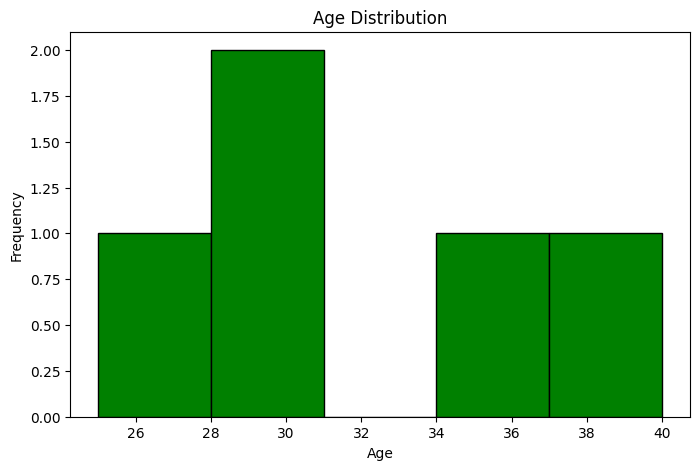

In [7]:
# 2. Histogram of Age Distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=5, color='green', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

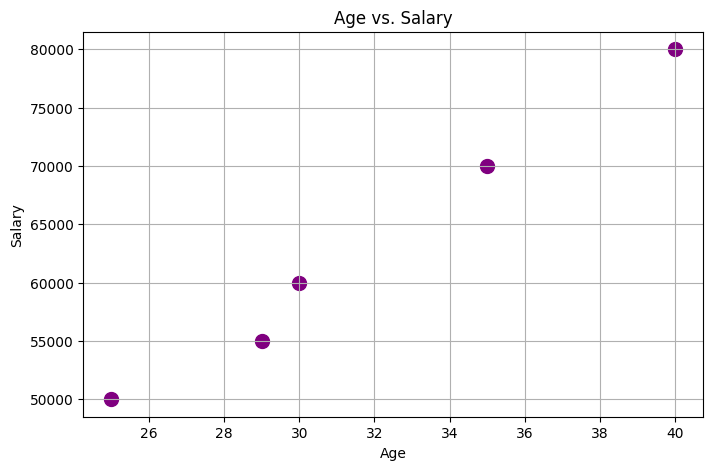

In [8]:
# 3. Scatter Plot of Age vs. Salary
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Salary'], color='purple', s=100)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


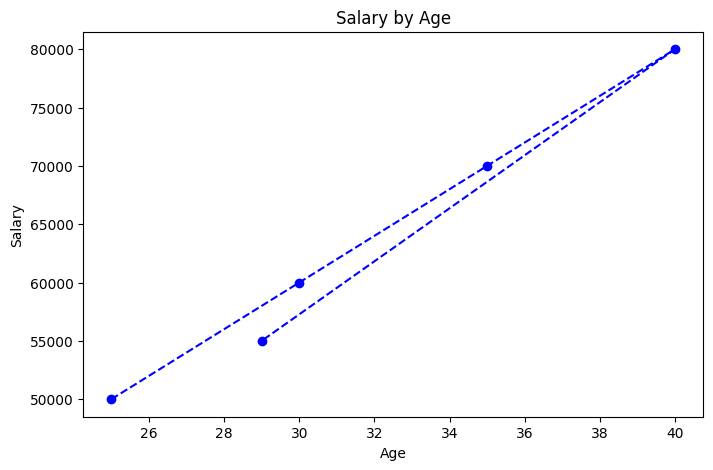

In [9]:
# 4. Line Plot of Salary by Age
plt.figure(figsize=(8, 5))
plt.plot(df['Age'], df['Salary'], marker='o', color='blue', linestyle='--')
plt.title('Salary by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


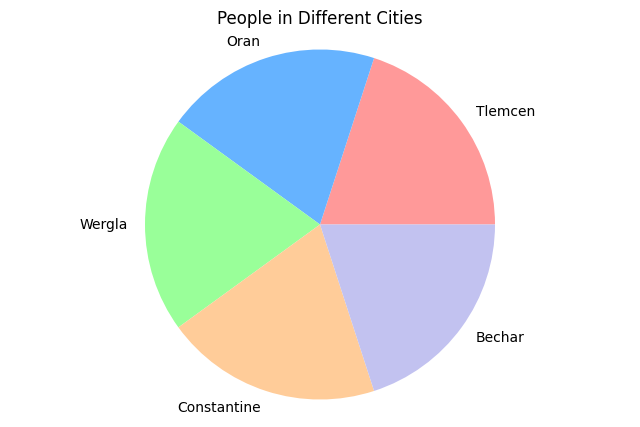

In [10]:
# 5. Pie Chart of People in Different Cities
plt.figure(figsize=(8, 5))
plt.pie(df['City'].value_counts(), labels=df['City'].value_counts().index, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('People in Different Cities')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


# 3_Data Manipulation

In [11]:
import pandas as pd

# Create a sample dataset
data = {
    'Name': ['Amin', 'Nawel', 'Asma', 'Rachid', 'Bachir'],
    'Age': [25, 30, 35, 40, 29],
    'City': ['Tlemcen', 'Oran', 'Wergla', 'Constantine', 'Bechar'],
    'Salary': [50000, 60000, 70000, 80000, 55000],
    'Department': ['HR', 'Finance', 'Finance', 'HR', 'Marketing']
}

# Create a DataFrame
df = pd.DataFrame(data)

df

,Name,Age,City,Salary,Department
0,Amin,25,Tlemcen,50000,HR
1,Nawel,30,Oran,60000,Finance
2,Asma,35,Wergla,70000,Finance
3,Rachid,40,Constantine,80000,HR
4,Bachir,29,Bechar,55000,Marketing


In [12]:
# Step 1: Filtering the data
# Filter to show only employees who are older than 30
filtered_df = df[df['Age'] > 30]

print('\n\n')

print("Employees older than 30:")
print('\n\n')
print(filtered_df)
print('\n\n\n')




Employees older than 30:



     Name  Age         City  Salary Department
2    Asma   35       Wergla   70000    Finance
3  Rachid   40  Constantine   80000         HR






In [13]:
# Step 2: Grouping the data
# Group by Department and calculate average Salary per department
grouped_df = df.groupby('Department')['Salary'].mean()
print("\nAverage Salary by Department:")
print('\n\n')
print(grouped_df)
print('\n\n\n')



Average Salary by Department:



Department
Finance      65000.0
HR           65000.0
Marketing    55000.0
Name: Salary, dtype: float64






In [14]:
# Step 3: Aggregating data
# Aggregate to get both average and max Salary per department
agg_df = df.groupby('Department').agg(
    avg_salary=('Salary', 'mean'),
    max_salary=('Salary', 'max')
)

print("\nAggregated Salary Data (Average and Max Salary) by Department:")
print('\n\n')
print(agg_df)
print('\n\n\n')


Aggregated Salary Data (Average and Max Salary) by Department:



            avg_salary  max_salary
Department                        
Finance        65000.0       70000
HR             65000.0       80000
Marketing      55000.0       55000






In [15]:
# Step 4: Sorting the Data
# Sort employees by Salary in descending order
sorted_df = df.sort_values(by='Salary', ascending=False)
print("\nEmployees sorted by Salary (Descending Order):")
print('\n\n')
print(sorted_df)
print('\n\n\n')


Employees sorted by Salary (Descending Order):



     Name  Age         City  Salary Department
3  Rachid   40  Constantine   80000         HR
2    Asma   35       Wergla   70000    Finance
1   Nawel   30         Oran   60000    Finance
4  Bachir   29       Bechar   55000  Marketing
0    Amin   25      Tlemcen   50000         HR




